In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [2]:
from textblob import TextBlob
# import sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# # import warnings
# # warnings.filterwarnings("ignore")

# # sns.set(font_scale=1.5)
# # sns.set_style("whitegrid")
# # Load the LDA model from sk-learn
# from sklearn.decomposition import LatentDirichletAllocation as LDA
# # Tf-Idf and Clustering packages
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from nltk.tag import StanfordNERTagger


In [4]:
tweet_df_location = pd.read_csv('../data/TwitterData/2019/combine/climateTwitterData_Updated.csv')
tweet_df_location = tweet_df_location[tweet_df_location['text'].notna()]

In [5]:
print(tweet_df_location.shape);tweet_df_location.head()

(72405, 15)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.211810e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.210590e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.210260e+18,1.339821e+09,"A year of resistance, as youth protests shape...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [6]:
tweet_df_location['search_hashtags'] = tweet_df_location['search_hashtags'].str.lower()

In [7]:
tweet_df_location.groupby('search_hashtags')['id'].count()

search_hashtags
#actonclimate         1895
#bushfires             899
#climateaction        6378
#climatechange       16190
#climatecrisis        4982
#climatestrike       18355
#environment          4703
#fridaysforfuture     3038
#globalwarming        4152
#greennewdeal         4589
#savetheplanet        1434
#sustainability       5790
Name: id, dtype: int64

In [8]:
#remove unnessary words
#Complie all regular expressions
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).
    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.
    Returns
    -------
    The same txt string with url's removed.
    """
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
#     return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split()) 

In [9]:
clean_url_df = tweet_df_location

clean_url_df['text'] = [remove_url(text) for text in clean_url_df['text']]


In [10]:
print(clean_url_df.shape);clean_url_df.head()

(72405, 15)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.211810e+18,7.590000e+17,2020 is the year we votethemout the year we cl...,15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.210590e+18,1.070000e+18,WEEK 55 of ClimateStrike at the UN Next week F...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.210260e+18,1.339821e+09,A year of resistance as youth protests shaped ...,1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS greta gretathunberg climatechan...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [11]:
textBlob_df = clean_url_df

# Create textblob objects of the tweets
list_sentiment_polarity = []
list_sentiment_subjectivity = []
list_sentiment_object = []
list_sentiment = []


for tweet in textBlob_df['text']:
    
#     print(tweet)
    sentiment_objects = TextBlob(tweet)
    polarity = sentiment_objects.polarity
    if  polarity >= 0:
        list_sentiment.append('positive')
    else:
        list_sentiment.append('negative')
    list_sentiment_polarity.append(polarity)
    
    list_sentiment_subjectivity.append(sentiment_objects.subjectivity)
    list_sentiment_object.append((str(sentiment_objects)))
#     print(sentiment_objects)
    
    
clean_url_df["sentiment_polarity"] = list_sentiment_polarity
clean_url_df["sentiment_subjectivity"] = list_sentiment_subjectivity
# clean_url_df["sentiment_text"] = list_sentiment_object
clean_url_df["textBlob_sentiment"] = list_sentiment


clean_url_df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location,sentiment_polarity,sentiment_subjectivity,textBlob_sentiment
0,0,1.211810e+18,7.590000e+17,2020 is the year we votethemout the year we cl...,15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA",-0.100000,0.462500,negative
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA",0.000000,0.000000,positive
2,2,1.210590e+18,1.070000e+18,WEEK 55 of ClimateStrike at the UN Next week F...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA",0.166667,0.333333,positive
3,3,1.210260e+18,1.339821e+09,A year of resistance as youth protests shaped ...,1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA",0.183333,0.600000,positive
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS greta gretathunberg climatechan...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA",0.650000,0.800000,positive


In [12]:
# textBlob_df.to_csv('../data/graphAnalysis/TextBlob_Sentiment_climateTwitterData_Jan20.csv', index=False)


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is *specifically attuned to sentiments expressed in social media*. 


====================================
About the Scoring
==================

* The ``compound`` score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative.
Typical threshold values (used in the literature cited on this page) are:

#. **positive sentiment**: ``compound`` score >= 0.05
#. **neutral sentiment**: (``compound`` score > -0.05) and (``compound`` score < 0.05)
#. **negative sentiment**: ``compound`` score <= -0.05

In [13]:
#initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
vader_sentiment = []
for tweet in clean_url_df['text']:
    scores = analyzer.polarity_scores(tweet)
    compound_list.append(scores["compound"])            
    positive_list.append(scores["pos"]) 
    negative_list.append(scores["neg"]) 
    neutral_list.append(scores["neu"])
    
    if scores['compound'] >= 0.05:
        vader_sentiment.append('Positive')
    elif scores['compound'] > -0.05 and scores['compound'] < 0.05:
         vader_sentiment.append('Neutral')
    elif scores['compound'] <= -0.05:
        vader_sentiment.append('Negative')
        
# https://github.com/cjhutto/vaderSentiment#about-the-scoring        
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05        
        
clean_url_df["vader_compound"] = compound_list
clean_url_df["vader_pos"] = positive_list
clean_url_df["vader_neg"] = negative_list
clean_url_df["vader_neu"] = neutral_list
clean_url_df["V_Sentiment"] = vader_sentiment

In [14]:

# clean_url_df.to_csv('../data/graphAnalysis/VaderSentiment_climateTwitterData_Jan20.csv', index=False)
clean_url_df.to_csv('../data/graphAnalysis/clean_climateTwitterData_Jan20.csv', index=False)

In [15]:
term_search_df = clean_url_df.groupby('search_hashtags')
compounds = clean_url_df["vader_compound"]
df_avg_sentiment = pd.DataFrame(term_search_df["vader_compound"].mean())

df_avg_sentiment.reset_index(inplace=True)
df_avg_sentiment.to_csv('../data/graphAnalysis/avg_sentiment_climateTwitterData_Jan20.csv', index=False)
df_avg_sentiment.head()

,search_hashtags,vader_compound
0,#actonclimate,0.226930
1,#bushfires,-0.060739
2,#climateaction,0.237451
3,#climatechange,0.081990
4,#climatecrisis,0.056043


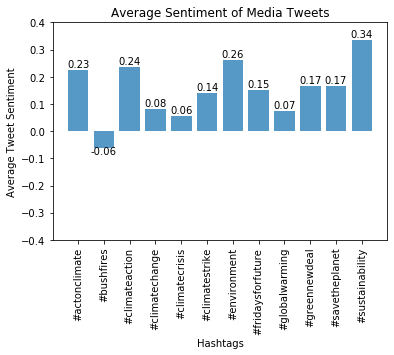

In [16]:
tick_locations = range(len(df_avg_sentiment))
plt.bar(tick_locations, df_avg_sentiment["vader_compound"], alpha=0.75)
plt.title(f"Average Sentiment of Media Tweets")
plt.xlabel("Hashtags")
plt.ylabel("Average Tweet Sentiment")
plt.xticks(tick_locations, df_avg_sentiment["search_hashtags"], rotation='vertical')
plt.ylim(-0.4,0.4)
for i in range(len(df_avg_sentiment)):
    if df_avg_sentiment["vader_compound"][i] > 0:
        plt.text(tick_locations[i],df_avg_sentiment["vader_compound"][i] + 0.01,"{0:.2f}".format(df_avg_sentiment["vader_compound"][i]), ha="center")
    else:
        plt.text(tick_locations[i],df_avg_sentiment["vader_compound"][i] - 0.025,"{0:.2f}".format(df_avg_sentiment["vader_compound"][i]), ha="center")

plt.savefig("../data/graphAnalysis/media_outlet_average_sentiment_Jan20.png")
plt.show()

In [17]:
term_location_df = clean_url_df.groupby('location')
compounds = clean_url_df["vader_compound"]
df_avg_loc_sentiment = pd.DataFrame(term_location_df["vader_compound"].mean())

df_avg_loc_sentiment.reset_index(inplace=True)
df_avg_loc_sentiment.to_csv('../data/graphAnalysis/avg_loc_sentiment_climateTwitterData_Jan20.csv', index=False)

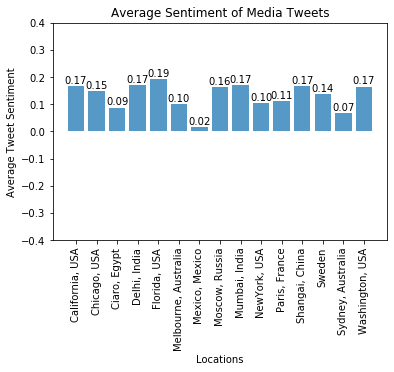

In [18]:
tick_locations = range(len(df_avg_loc_sentiment))
plt.bar(tick_locations, df_avg_loc_sentiment["vader_compound"], alpha=0.75)
plt.title(f"Average Sentiment of Media Tweets")
plt.xlabel("Locations")
plt.ylabel("Average Tweet Sentiment")
plt.xticks(tick_locations, df_avg_loc_sentiment["location"], rotation='vertical')
plt.ylim(-0.4,0.4)
for i in range(len(df_avg_loc_sentiment)):
    if df_avg_loc_sentiment["vader_compound"][i] > 0:
        plt.text(tick_locations[i],df_avg_loc_sentiment["vader_compound"][i] + 0.01,"{0:.2f}".format(df_avg_loc_sentiment["vader_compound"][i]), ha="center")
    else:
        plt.text(tick_locations[i],df_avg_loc_sentiment["vader_compound"][i] - 0.025,"{0:.2f}".format(df_avg_loc_sentiment["vader_compound"][i]), ha="center")

plt.savefig("../data/graphAnalysis/media_outlet_average_location_sentiment_Jan20.png")
plt.show()

In [19]:
clean_url_df['search_hashtags'].value_counts()


#climatestrike       18355
#climatechange       16190
#climateaction        6378
#sustainability       5790
#climatecrisis        4982
#environment          4703
#greennewdeal         4589
#globalwarming        4152
#fridaysforfuture     3038
#actonclimate         1895
#savetheplanet        1434
#bushfires             899
Name: search_hashtags, dtype: int64

In [20]:
clean_url_df.isnull().sum()

Unnamed: 0                    0
id                            0
author_id                     0
text                          0
retweets                      0
permalink                     0
date                          0
formatted_date                0
favorites                     0
mentions                  44851
hashtags                      3
geo                       72405
urls                      39056
search_hashtags               0
location                      0
sentiment_polarity            0
sentiment_subjectivity        0
textBlob_sentiment            0
vader_compound                0
vader_pos                     0
vader_neg                     0
vader_neu                     0
V_Sentiment                   0
dtype: int64